In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


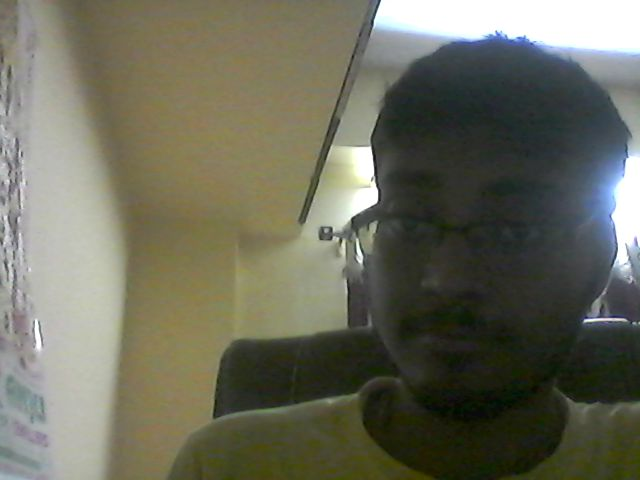

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
"""!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)"""

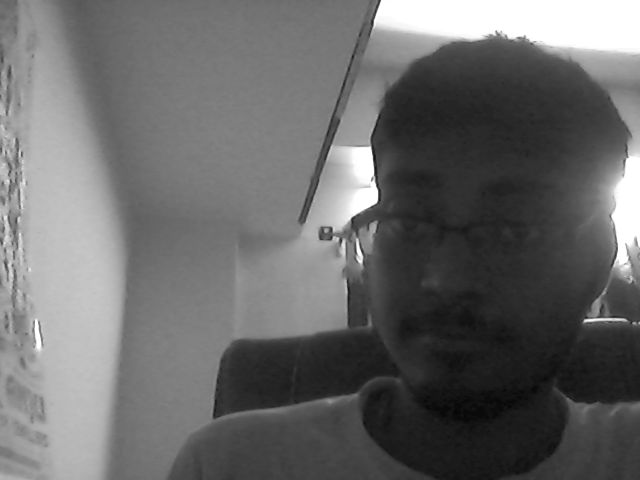

In [0]:
img = cv2.imread('photo.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
cv2.imwrite('photogray.png',img)

True

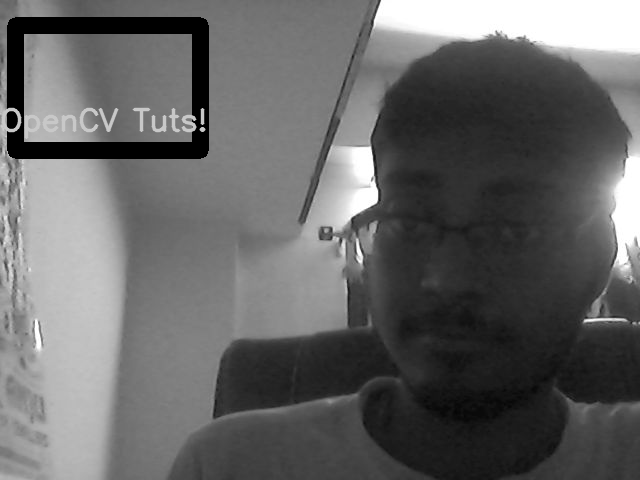

In [0]:
img = cv2.imread('photo.jpg', 0)
cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV Tuts!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

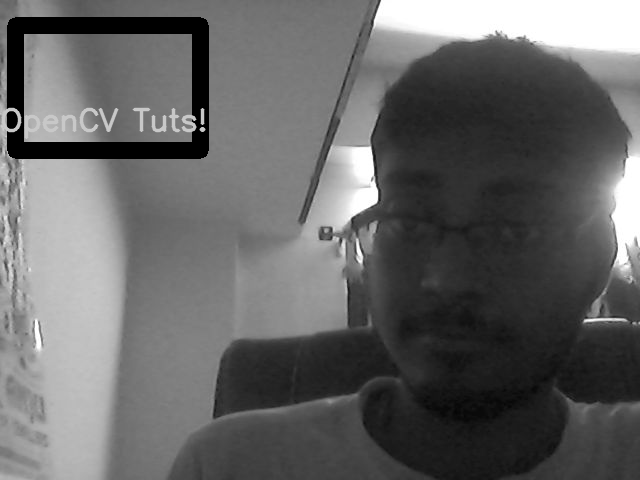

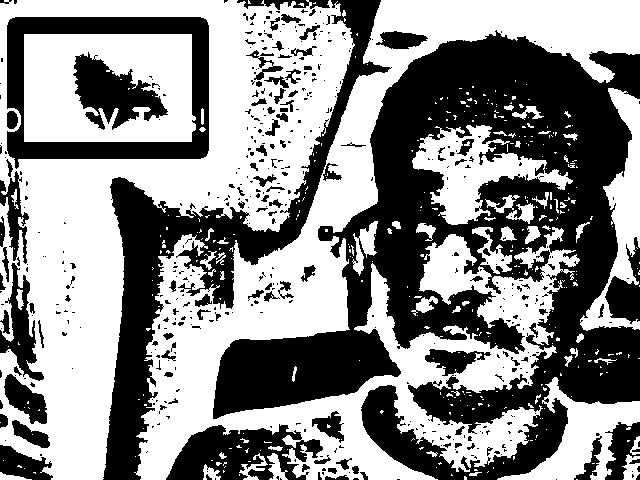

In [0]:
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2_imshow(img)
cv2_imshow(th)
cv2.waitKey(0)
cv2.destroyAllWindows()